In [2]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import os
import pymongo

In [15]:
# Data = os.chdir('D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix')

# images = []
# images_path = []
# for dirname, _, filenames in os.walk('D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix'):
#     for filenames in filenames:
#         path = os.path.join(dirname, filenames)
#         images_path.append(path)
#         image = cv2.imread(path)
#         images.append(image)

In [16]:
def average_BGR(image):
    avg_blue = image[:,:,0].mean()
    avg_green = image[:,:,1].mean()
    avg_red = image[:,:,2].mean()

    return [avg_blue,avg_green,avg_red]

def average_HSV(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    avg_hue = image[:,:,0].mean()
    avg_saturation = image[:,:,1].mean()
    avg_value = image[:,:,2].mean()

    return avg_hue, avg_saturation, avg_value

def kmeans_display(X, label):
    unique_labels = np.unique(label)
    markers = ['o', 's', '^', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', 'v', '<', '>', '8']  # List of markers for different clusters

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i, cluster_label in enumerate(unique_labels):
        X_cluster = X[label == cluster_label, :]
        marker = markers[i % len(markers)]  # Select a marker from the list cyclically

        ax.scatter(X_cluster[:, 0], X_cluster[:, 1], X_cluster[:, 2], marker=marker, s=20)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

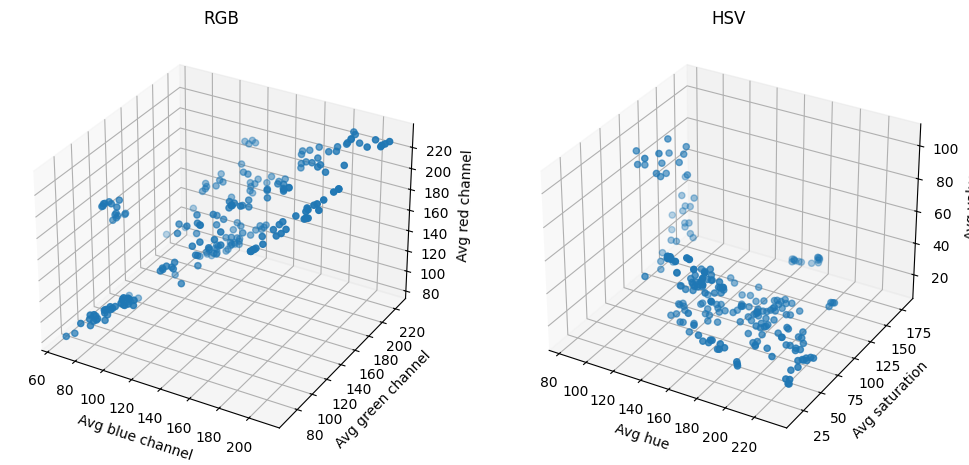

In [17]:
fig = plt.figure(figsize=(12, 6))

# Subplot for RGB
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('RGB')
ax1.set_xlabel('Avg blue channel')
ax1.set_ylabel('Avg green channel')
ax1.set_zlabel('Avg red channel')

# Subplot for HSV
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('HSV')
ax2.set_xlabel('Avg hue')
ax2.set_ylabel('Avg saturation')
ax2.set_zlabel('Avg value')

list_avg_blue = []
list_avg_green = []
list_avg_red = []

list_avg_hue=[]
list_avg_saturation=[]
list_avg_value=[]
X1 = []
X2 = []
list_image = []
list_image_path=[]
for dirname, _, filenames in os.walk('D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix'):
    for filename in filenames:
        image_path = os.path.join(dirname, filename)
        list_image_path.append(image_path)
        image = cv2.imread(image_path)
        list_image.append(image)
        avg_BGR = average_BGR(image)
        X1.append(avg_BGR)
        list_avg_blue.append(avg_BGR[0])
        list_avg_green.append(avg_BGR[1])
        list_avg_red.append(avg_BGR[2])
        avg_HSV= average_HSV(image)
        list_avg_hue.append(avg_HSV[0])
        list_avg_saturation.append(avg_HSV[1])
        list_avg_value.append(avg_HSV[2])
        X2.append(avg_HSV)

ax1.scatter(list_avg_blue, list_avg_green, list_avg_red)
ax2.scatter(list_avg_value,list_avg_saturation,list_avg_hue)

# plt.show()

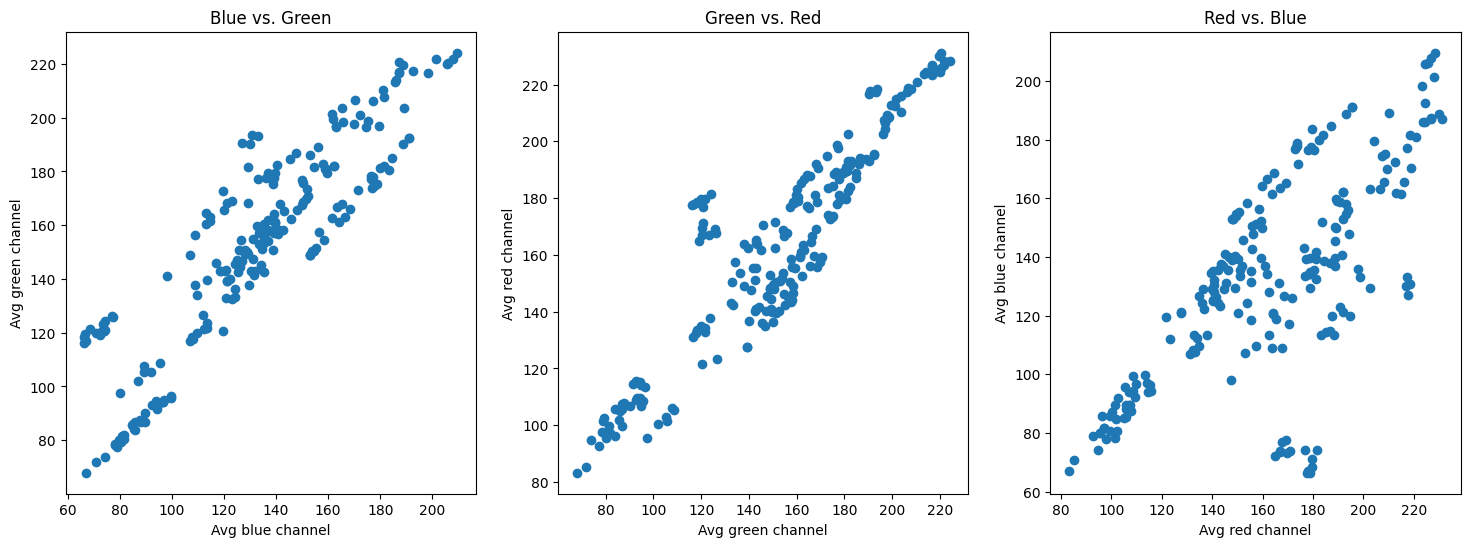

In [18]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot blue vs. green
axs[0].scatter(list_avg_blue, list_avg_green)
axs[0].set_xlabel('Avg blue channel')
axs[0].set_ylabel('Avg green channel')
axs[0].set_title('Blue vs. Green')

# Plot green vs. red
axs[1].scatter(list_avg_green, list_avg_red)
axs[1].set_xlabel('Avg green channel')
axs[1].set_ylabel('Avg red channel')
axs[1].set_title('Green vs. Red')

# Plot red vs. blue
axs[2].scatter(list_avg_red, list_avg_blue)
axs[2].set_xlabel('Avg red channel')
axs[2].set_ylabel('Avg blue channel')
axs[2].set_title('Red vs. Blue')

plt.show()

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centers found by scikit-learn:
[[174.48984444 199.28431111 208.44827222]
 [144.34657742 157.2389129  150.85706129]
 [ 86.8261      88.77453056 103.10059444]
 [ 71.70914667 120.92656    173.75235333]
 [145.23996296 182.15065556 194.85158889]
 [126.95564583 161.113675   179.9803625 ]
 [123.41174194 142.74026452 149.05688065]
 [194.60829286 218.08103571 226.08717857]
 [173.98307222 173.44776111 173.52216667]
 [113.20876364 124.06304545 130.6162    ]]


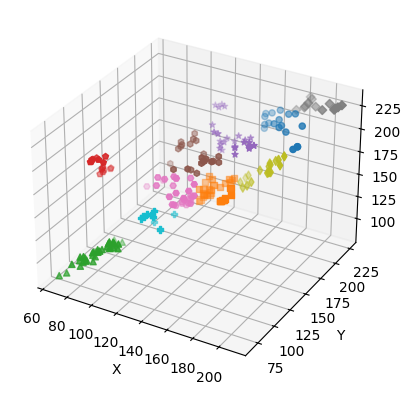

In [19]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=10,random_state =0)

X1 = np.array(X1)

kmeans1.fit(X1)


print('Centers found by scikit-learn:')
print(kmeans1.cluster_centers_)
pred_label = kmeans1.predict(X1)
kmeans_display(X1, pred_label)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

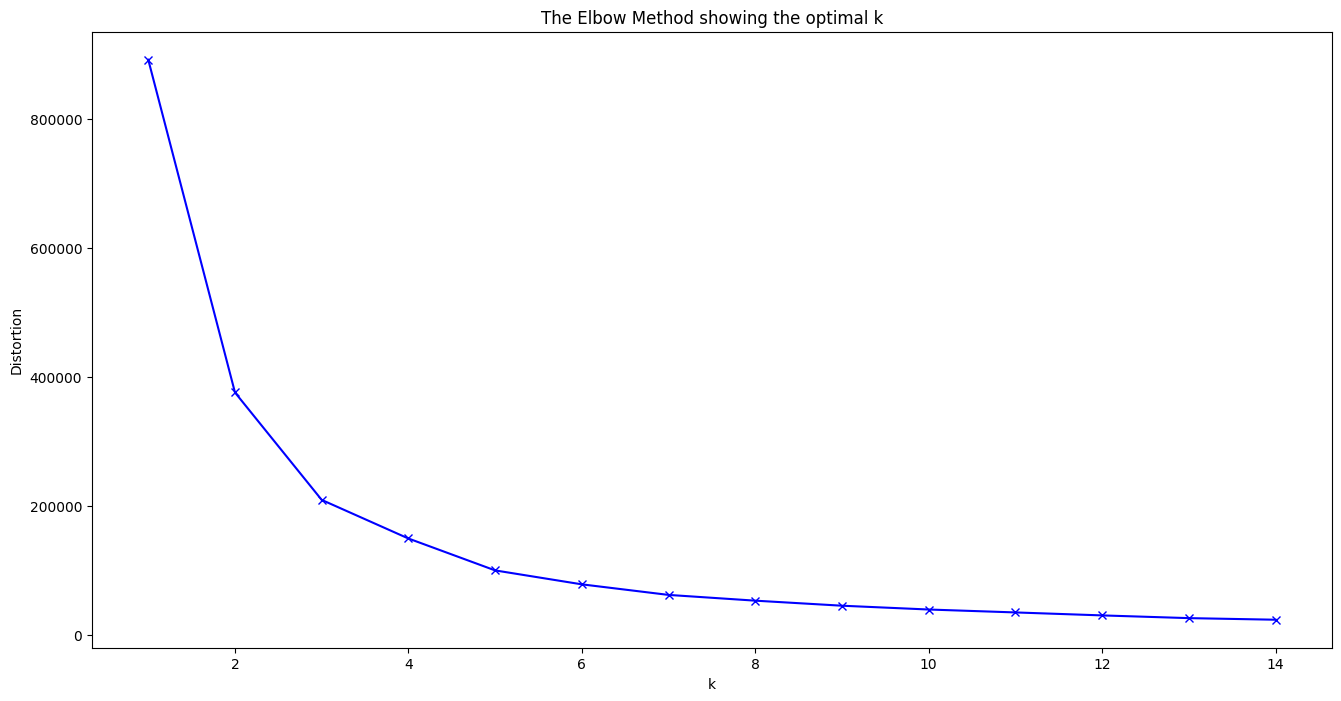

In [20]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centers found by scikit-learn:
[[ 74.22933333  15.32813333 165.43575333]
 [ 23.99286786  97.65680714 191.39643571]
 [ 94.85196     94.31786    107.31125333]
 [ 20.26515333 172.23953333 173.90971333]
 [ 21.74945769  69.93094231 195.87871154]
 [ 46.78221935  55.6506129  155.11283548]
 [ 39.788485   127.585285   100.630485  ]
 [ 27.44935714  26.31848571 179.77884286]
 [ 17.480295    53.495255   222.478025  ]
 [ 22.03905926  69.8302037  144.14539259]
 [ 21.75761429  96.81638571 164.37935714]]


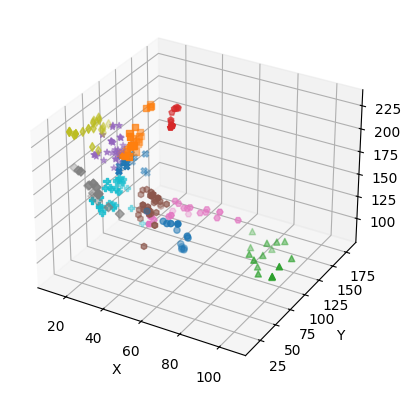

In [21]:
kmeans2 = KMeans(n_clusters=11,random_state =0)

X2 = np.array(X2)

kmeans2.fit(X2)

print('Centers found by scikit-learn:')
print(kmeans2.cluster_centers_)
pred_label2 = kmeans2.predict(X2)
kmeans_display(X2, pred_label2)

In [22]:
all_list_image=[]
for i in range(len(pred_label2)):
  all_list_image.append((pred_label2[i],None,list_image_path[i],X1[i],X2[i]))
  if pred_label2[i]==5:
    print(list_image_path[i])

D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Eggplant (09).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (01).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (02).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (03).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (04).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (05).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (06).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (07).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (08).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (09).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (10).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (11).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (12).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (13).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (14).jpg
D:\PTIT\CSDLDPT\Multimedia-Database-System\Mix\Mango (15).jpg
D:\PT

In [24]:
all_list_array=[]
for i in range(len(pred_label2)):
   all_list_array.append((pred_label2[i],X1[i],X2[i],list_image_path[i]))
print(all_list_array)

[(9, array([136.8012, 154.0514, 151.8798]), array([ 20.8068,  80.2229, 154.0876]), 'D:\\PTIT\\CSDLDPT\\Multimedia-Database-System\\Mix\\Avocado (01).jpg'), (9, array([131.1489, 147.4319, 145.4068]), array([ 21.2552,  84.1484, 147.4488]), 'D:\\PTIT\\CSDLDPT\\Multimedia-Database-System\\Mix\\Avocado (02).jpg'), (9, array([130.5005, 142.9855, 140.8643]), array([ 21.2388,  79.8446, 143.0017]), 'D:\\PTIT\\CSDLDPT\\Multimedia-Database-System\\Mix\\Avocado (03).jpg'), (9, array([132.097 , 143.1298, 140.8104]), array([ 21.7633,  77.0261, 143.1767]), 'D:\\PTIT\\CSDLDPT\\Multimedia-Database-System\\Mix\\Avocado (04).jpg'), (9, array([138.8499, 150.6375, 148.069 ]), array([ 22.6615,  72.3086, 150.7136]), 'D:\\PTIT\\CSDLDPT\\Multimedia-Database-System\\Mix\\Avocado (05).jpg'), (9, array([142.5988, 158.1907, 155.8741]), array([ 21.9865,  73.9986, 158.2611]), 'D:\\PTIT\\CSDLDPT\\Multimedia-Database-System\\Mix\\Avocado (06).jpg'), (6, array([ 87.0346, 102.1   , 100.3139]), array([ 28.4356, 107.7157,

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centers found by scikit-learn:
[[ 74.22933333  15.32813333 165.43575333]
 [ 23.99286786  97.65680714 191.39643571]
 [ 94.85196     94.31786    107.31125333]
 [ 20.26515333 172.23953333 173.90971333]
 [ 21.74945769  69.93094231 195.87871154]
 [ 46.78221935  55.6506129  155.11283548]
 [ 39.788485   127.585285   100.630485  ]
 [ 27.44935714  26.31848571 179.77884286]
 [ 17.480295    53.495255   222.478025  ]
 [ 22.03905926  69.8302037  144.14539259]
 [ 21.75761429  96.81638571 164.37935714]]


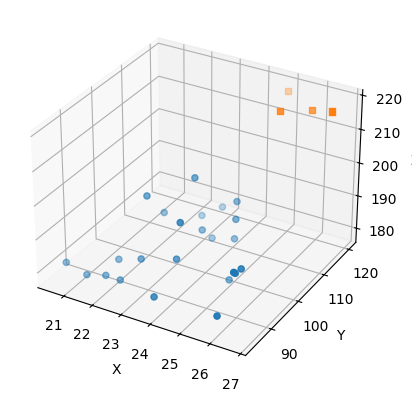

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centers found by scikit-learn:
[[ 74.22933333  15.32813333 165.43575333]
 [ 23.99286786  97.65680714 191.39643571]
 [ 94.85196     94.31786    107.31125333]
 [ 20.26515333 172.23953333 173.90971333]
 [ 21.74945769  69.93094231 195.87871154]
 [ 46.78221935  55.6506129  155.11283548]
 [ 39.788485   127.585285   100.630485  ]
 [ 27.44935714  26.31848571 179.77884286]
 [ 17.480295    53.495255   222.478025  ]
 [ 22.03905926  69.8302037  144.14539259]
 [ 21.75761429  96.81638571 164.37935714]]


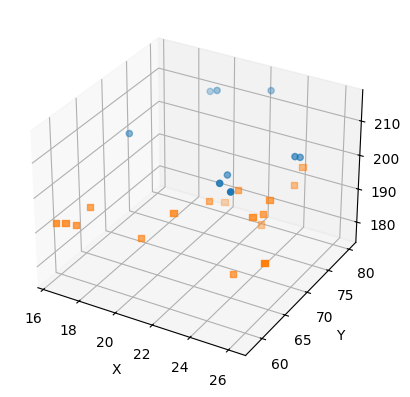

Centers found by scikit-learn:
[[ 74.22933333  15.32813333 165.43575333]
 [ 23.99286786  97.65680714 191.39643571]
 [ 94.85196     94.31786    107.31125333]
 [ 20.26515333 172.23953333 173.90971333]
 [ 21.74945769  69.93094231 195.87871154]
 [ 46.78221935  55.6506129  155.11283548]
 [ 39.788485   127.585285   100.630485  ]
 [ 27.44935714  26.31848571 179.77884286]
 [ 17.480295    53.495255   222.478025  ]
 [ 22.03905926  69.8302037  144.14539259]
 [ 21.75761429  96.81638571 164.37935714]]


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


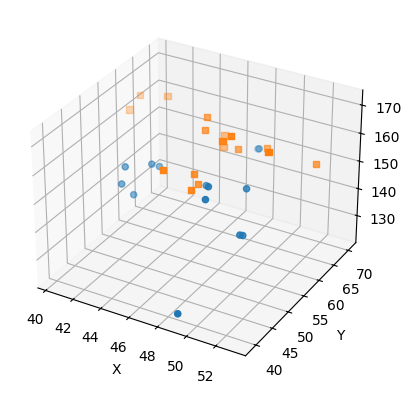

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centers found by scikit-learn:
[[ 74.22933333  15.32813333 165.43575333]
 [ 23.99286786  97.65680714 191.39643571]
 [ 94.85196     94.31786    107.31125333]
 [ 20.26515333 172.23953333 173.90971333]
 [ 21.74945769  69.93094231 195.87871154]
 [ 46.78221935  55.6506129  155.11283548]
 [ 39.788485   127.585285   100.630485  ]
 [ 27.44935714  26.31848571 179.77884286]
 [ 17.480295    53.495255   222.478025  ]
 [ 22.03905926  69.8302037  144.14539259]
 [ 21.75761429  96.81638571 164.37935714]]


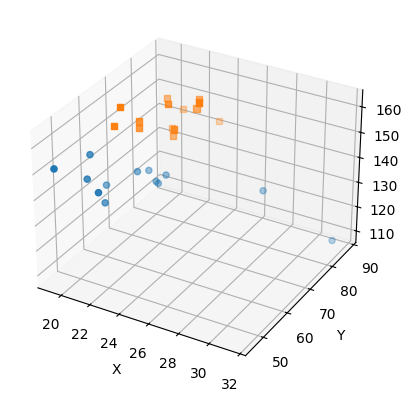

In [25]:
result = []
result_pred_label2 = []
for i in range(11):
  len_label = len([key for key,value1,value2,image in all_list_array if key == i])
  count = len_label//13
  if count >1:
    kmeans2_label1 = KMeans(n_clusters=count ,random_state =0)

    result = [value2 for key,value1,value2,image in all_list_array if key == i]
    result = np.array(result)

    kmeans2_label1.fit(result)

    print('Centers found by scikit-learn:')
    print(kmeans2.cluster_centers_)
    result_pred_label2 = (kmeans2_label1.predict(result))
    kmeans_display(result, result_pred_label2)
    for index, (key1, key2, image, value1,value2) in enumerate(all_list_image):
      for i in range(len(result_pred_label2)):
          if (value2 == result[i]).all():
              # Tạo một bản sao của tuple hiện tại
              updated_tuple = list(all_list_image[index])
              # Thay đổi giá trị của key2 trong danh sách
              updated_tuple[1] = result_pred_label2[i]
              # Chuyển đổi danh sách đã được cập nhật thành tuple và gán lại vào all_list_image
              all_list_image[index] = tuple(updated_tuple)


In [ ]:
tmp = [[] for _ in range(11)]
for key1, key2, image, value1, value2 in all_list_image:
  if key2 != None:
    tmp[key1].append([key2,image,value1,value2])

for index, (i) in enumerate(tmp):
  if len(i)>0:
    print(index)
    for key2,image,value1,value2 in i:
      if key2==0:
        print(image)
    print()
    for key2,image,value1,value2 in i:
      if key2==1:
        print(image)

1
/content/drive/MyDrive/Mix/Banana (13).jpg
/content/drive/MyDrive/Mix/Pear (08).jpg
/content/drive/MyDrive/Mix/Pear (13).jpg
/content/drive/MyDrive/Mix/Potato (01).jpg
/content/drive/MyDrive/Mix/Potato (15).jpg
/content/drive/MyDrive/Mix/Potato (12).jpg
/content/drive/MyDrive/Mix/Potato (11).jpg
/content/drive/MyDrive/Mix/Potato (07).jpg
/content/drive/MyDrive/Mix/Potato (04).jpg
/content/drive/MyDrive/Mix/Potato (03).jpg
/content/drive/MyDrive/Mix/Potato (02).jpg

/content/drive/MyDrive/Mix/Kiwi (14).jpg
/content/drive/MyDrive/Mix/Kiwi (02).jpg
/content/drive/MyDrive/Mix/Kiwi (15).jpg
/content/drive/MyDrive/Mix/Kiwi (06).jpg
/content/drive/MyDrive/Mix/Kiwi (07).jpg
/content/drive/MyDrive/Mix/Kiwi (08).jpg
/content/drive/MyDrive/Mix/Potato (14).jpg
/content/drive/MyDrive/Mix/Potato (08).jpg
/content/drive/MyDrive/Mix/Strawberry (11).jpg
5
/content/drive/MyDrive/Mix/Banana (11).jpg
/content/drive/MyDrive/Mix/Banana (10).jpg
/content/drive/MyDrive/Mix/Banana (03).jpg
/content/drive/MyD